In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from sklearn.datasets import fetch_openml
mist = fetch_openml('mnist_784', as_frame=True)

In [14]:
# import pandas as pd

# mist_df = pd.DataFrame(mist.data, columns=mist.feature_names)
# mist_df

In [15]:
X, y = mist.data, mist.target # X is the feature set, y is the target variable which is the digit label like 0, 1, 2, ..., 9
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X.shape

(70000, 784)

In [17]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
y.shape

(70000,)

In [28]:
X.iloc[0]  # Get the first digit
X.iloc[0].to_numpy().reshape(28, 28)  # Reshape it to 28x28 pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

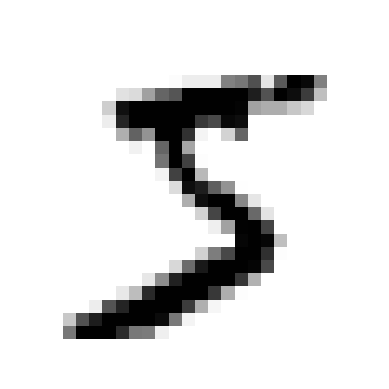

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(image_data):
    image = image_data.reshape(28, 28)  # Reshape the flat array into a 28x28 image
    plt.imshow(image, cmap='binary') # Use binary colormap for black and white
    plt.axis('off')  # Hide the axes

some_digit = X.iloc[0].to_numpy()  # OR use .values instead
plot_digit(some_digit)
plt.show()

In [29]:
y.iloc[0]  # Get the label for the first digit

'5'

In [33]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

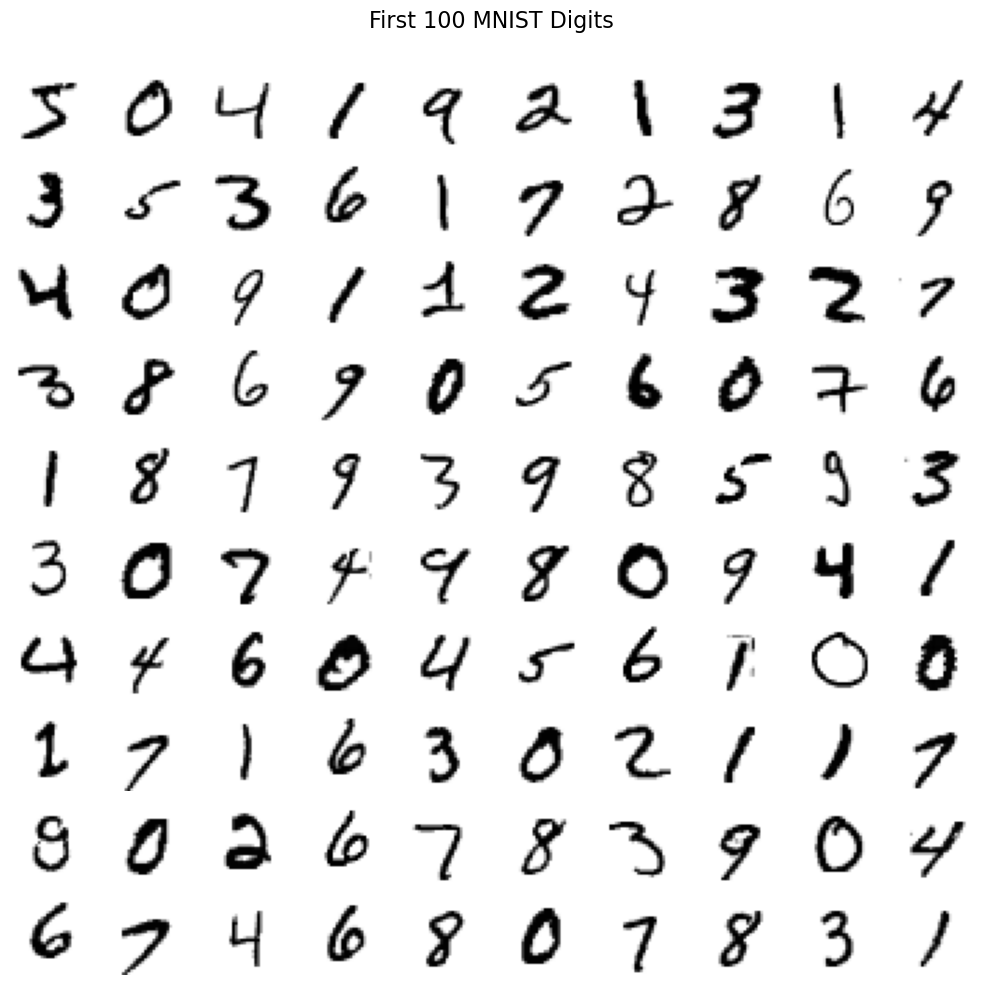

In [36]:
X_100 = X[:100]
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.suptitle("First 100 MNIST Digits", fontsize=16)
for i in range(10):
    for j in range(10):
        index = i * 10 + j
        ax = axes[i][j]
        ax.imshow(X_100.iloc[index].to_numpy().reshape(28, 28), cmap="binary")
        ax.axis("off")  # Hide the axes

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for the suptitle
plt.show()

In [49]:
y_train_5 = (y_train == '5')  # Create a binary target variable for the digit '5'
y_test_5 = (y_test == '5')  # Same for the test set
print(np.count_nonzero(y_test_5).sum(),"<- is the test label and that also train label ->",np.count_nonzero(y_train_5).sum())

892 <- is the test label and that also train label -> 5421


In [50]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)  # Train the model on the training set

SGDClassifier(random_state=42)

In [56]:
sgd_clf.predict([X.iloc[60001]])  # Predict the label for the first digit

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")  # Evaluate the model using cross-validation

array([0.95035, 0.96035, 0.9604 ])

In [58]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)  # Train the dummy classifier
print(any(dummy_clf.predict(x_train))) # Check if the dummy classifier predicts any '5's [print false no '5' detected]

False


In [59]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring="accuracy")  # Evaluate the dummy classifier using cross-validation

array([0.90965, 0.90965, 0.90965])

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [63]:
skfolds = StratifiedKFold(n_splits=3) # add shuffle=true if the dataset is not already shuffled

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)  # Create a fresh copy of the classifier
    x_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)  # Train the classifier on the training folds
    y_pred = clone_clf.predict(x_test_fold)  # Predict on the test fold
    n_correct = np.sum(y_pred == y_test_fold)  # Count the number of correct predictions
    print(f"Correct predictions: {n_correct} out of {len(y_pred)} = {n_correct/len(y_pred)}")  # Print the number of correct predictions
    

Correct predictions: 19007 out of 20000 = 0.95035
Correct predictions: 19207 out of 20000 = 0.96035
Correct predictions: 19208 out of 20000 = 0.9604
